<a href="https://colab.research.google.com/github/maulanaakbardj/Forecasting-vaccination/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autocorrelation and Partial Autocorrelation based vaccine distribution in Indonesia

In [ ]:
!pip install pmdarima
!pip install shap
!pip install --upgrade mxnet~=1.7 gluonts
!pip install python-utils
!pip install plotly==4.1.0
!pip install -U scikit-learn

     |████████████████████████████████| 1.5 MB 4.8 MB/s 
     |████████████████████████████████| 9.5 MB 42.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 356 kB 5.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491647 sha256=4ab372e04a38c6d9b3d66b957e1de952acd5ddd66b6415ab6c402bbdcc9c02ba
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
     |████████████████████████████████| 46.9 MB 37 kB/s 
     |████████████████████████████████| 2.1 MB 53.6 MB/s 
     |████████████████████████████████| 10.1 MB 47.0 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extens

In [ ]:
import pandas as pd
import numpy as np

# Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

# Statistics 
import scipy
import statsmodels as sms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
data = pd.read_csv('/content/vaksin indo.csv', delimiter=';')
data.tail(10)

,Tanggal,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan publik,Vaksinasi 2 Pelayan publik,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Vaksinasi 2 Total Indonesia
167,19-Aug-21,1619070,1498060,5063765,3529094,48978129,24850572,208265720,55660964,29877726
168,20-Aug-21,1622338,1501857,5083907,3558550,49616039,25529638,208265720,56322284,30590045
169,21-Aug-21,1624226,1504136,5093126,3569648,49969129,25874587,208265720,56686481,30948371
170,22-Aug-21,1627357,1507894,5113316,3592892,50562888,26486661,208265720,57303561,31587447
171,23-Aug-21,1627523,1508089,5114412,3593533,50598794,26501011,208265720,57340729,31602633
172,24-Aug-21,1630171,1511295,5133555,3614799,51259298,27121156,208265720,58023024,32247250
173,25-Aug-21,1632920,1514205,5153027,3635848,51926158,27649163,208265720,58712105,32799216
174,26-Aug-21,1635703,1516815,5173665,3657656,52571835,28169680,208265720,59381203,33344151
175,27-Aug-21,1636776,1517893,5173487,3658276,52616674,28181178,208265720,59426937,33357347
176,28-Aug-21,1642557,1523167,5213872,3698155,53935191,29214383,208265720,60791620,34435705


In [ ]:
data['Tanggal']=pd.to_datetime(data['Tanggal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Tanggal                             177 non-null    datetime64[ns]
 1   Vaksinasi 1 Tenaga Kesehatan        177 non-null    int64         
 2   Vaksinasi 2 Tenaga Kesehatan        177 non-null    int64         
 3   Vaksinasi 1 Lansia                  177 non-null    int64         
 4   Vaksinasi 2 Lansia                  177 non-null    int64         
 5   Vaksinasi 1 Pelayan publik          177 non-null    int64         
 6   Vaksinasi 2 Pelayan publik          177 non-null    int64         
 7   Target Vaksinisasi total Indonesia  177 non-null    int64         
 8   Vaksinasi 1 Total Indonesia         177 non-null    int64         
 9   Vaksinasi 2 Total Indonesia         177 non-null    int64         
dtypes: datetime64[ns](1), int6

## Vaksinisasi 1

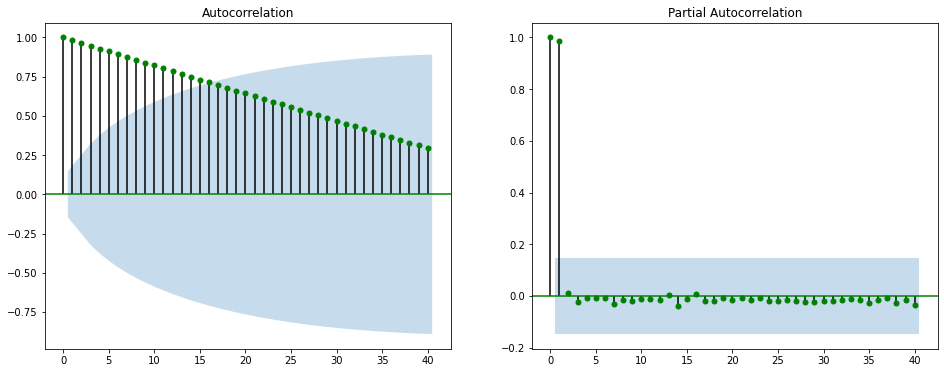

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(121); plot_acf(data["Vaksinasi 1 Total Indonesia"], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data["Vaksinasi 1 Total Indonesia"], lags = 40,ax = plt.gca(), color = 'green')
plt.show()

In [ ]:
result = adfuller(data["Vaksinasi 1 Total Indonesia"].dropna())
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Statistics  1.2562015932209303
p-value 0.9963520843271225
critical values 4533.967224217287
Reject the null hypotheise , it mean data is not stationary


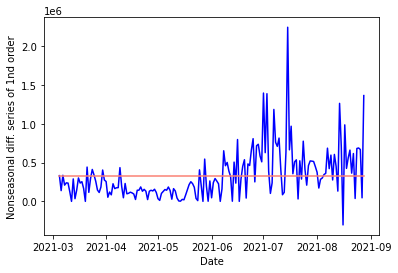

ADF Statistics  -1.2332043684790945
p-value 0.6591514717571083
critical values 4533.476846610911
Reject the null hypotheise , it mean data is not stationary


In [ ]:
data['diff1'] = data["Vaksinasi 1 Total Indonesia"].diff()
data['diff1'] = data['diff1'].fillna(data['diff1'].mean())
ax = sns.lineplot(x = data['Tanggal'], y = data['diff1'], color='blue')
sns.lineplot(x = data['Tanggal'], y = data['diff1'].mean(), color='salmon')
plt.xlabel('Date')
plt.ylabel('Nonseasonal diff. series of 1nd order')
plt.show()
result = adfuller(data.diff1)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

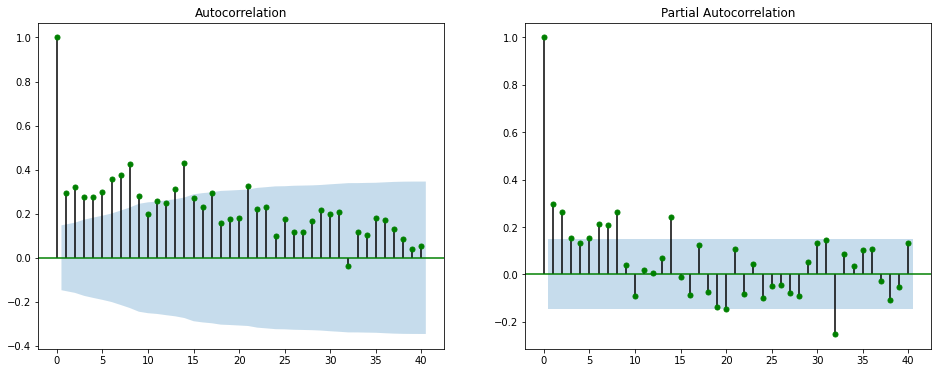

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(121); plot_acf(data['diff1'], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data['diff1'], lags = 40,ax = plt.gca(), color = 'green')
plt.show()

## Vaksinisasi 2

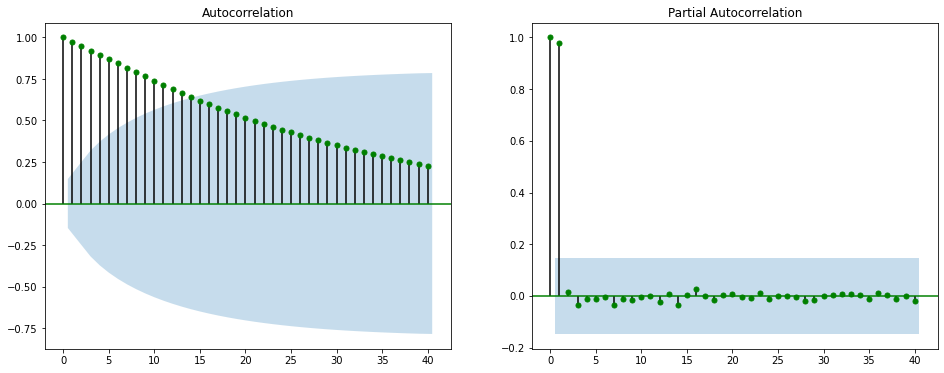

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(121); plot_acf(data["Vaksinasi 2 Total Indonesia"], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data["Vaksinasi 2 Total Indonesia"], lags = 40,ax = plt.gca(), color = 'green')
plt.show()

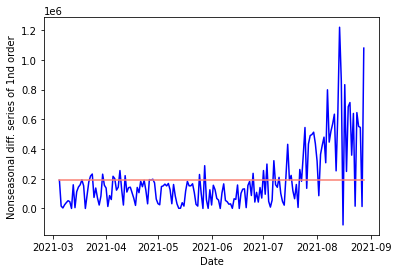

ADF Statistics  -1.2332043684790945
p-value 0.6591514717571083
critical values 4533.476846610911
Reject the null hypotheise , it mean data is not stationary


In [ ]:
data['diff2'] = data["Vaksinasi 2 Total Indonesia"].diff()
data['diff2'] = data['diff2'].fillna(data['diff2'].mean())
ax = sns.lineplot(x = data['Tanggal'], y = data['diff2'], color='blue')
sns.lineplot(x = data['Tanggal'], y = data['diff2'].mean(), color='salmon')
plt.xlabel('Date')
plt.ylabel('Nonseasonal diff. series of 1nd order')
plt.show()
result = adfuller(data.diff1)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

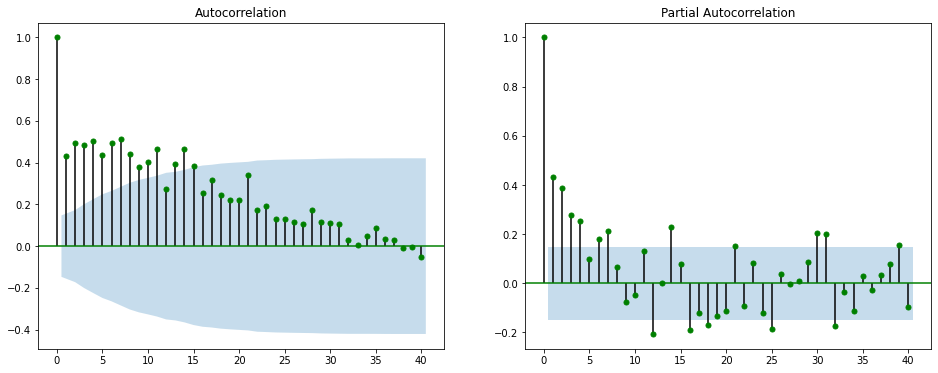

In [ ]:
plt.figure(figsize = (16,6))
plt.subplot(121); plot_acf(data['diff2'], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data['diff2'], lags = 40,ax = plt.gca(), color = 'green')
plt.show()

In [ ]:
data.tail()

,Tanggal,Vaksinasi 1 Tenaga Kesehatan,Vaksinasi 2 Tenaga Kesehatan,Vaksinasi 1 Lansia,Vaksinasi 2 Lansia,Vaksinasi 1 Pelayan publik,Vaksinasi 2 Pelayan publik,Target Vaksinisasi total Indonesia,Vaksinasi 1 Total Indonesia,Vaksinasi 2 Total Indonesia,diff1,diff2
172,2021-08-24,1630171,1511295,5133555,3614799,51259298,27121156,208265720,58023024,32247250,682295.0,644617.0
173,2021-08-25,1632920,1514205,5153027,3635848,51926158,27649163,208265720,58712105,32799216,689081.0,551966.0
174,2021-08-26,1635703,1516815,5173665,3657656,52571835,28169680,208265720,59381203,33344151,669098.0,544935.0
175,2021-08-27,1636776,1517893,5173487,3658276,52616674,28181178,208265720,59426937,33357347,45734.0,13196.0
176,2021-08-28,1642557,1523167,5213872,3698155,53935191,29214383,208265720,60791620,34435705,1364683.0,1078358.0


# ARIMA

## Vaksinisasi 1


167    5.508894e+07
168    5.588863e+07
169    5.649488e+07
170    5.676274e+07
171    5.751881e+07
172    5.726985e+07
173    5.832279e+07
174    5.886705e+07
175    5.958584e+07
176    5.936370e+07
Name: predicted_mean, dtype: float64


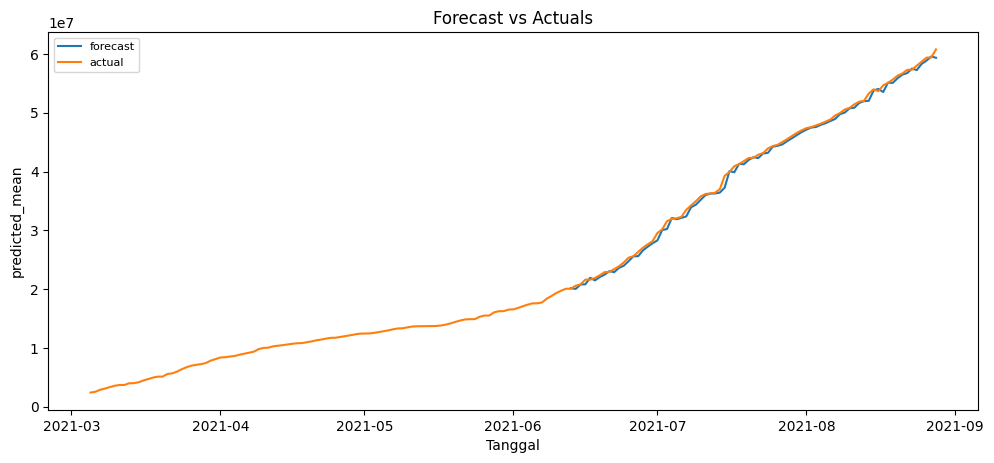

In [ ]:
train = data["Vaksinasi 1 Total Indonesia"][:100]
test = data["Vaksinasi 1 Total Indonesia"][100:]
model1 = ARIMA(data["Vaksinasi 1 Total Indonesia"], order = (0,1,1))
model1 = model1.fit()
start = len(train)
end = len(train)+len(test)-1
pred = model1.predict(start=start, end=end, typ = 'levels')
print(pred.tail(10))
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=data['Tanggal'], y = pred, label='forecast')
sns.lineplot(x=data['Tanggal'], y = data["Vaksinasi 1 Total Indonesia"], label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
mean_squared_error(test, pred, squared = False)

567238.2454115598

In [ ]:
pred.mean()

40275763.884618595

In [ ]:
mean_absolute_percentage_error(test,pred)

0.011543475980063035

In [ ]:
from sklearn.metrics import r2_score
r2_score(test, pred)

0.9977948708290115

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test, pred))

427057.5673599698


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(test, pred))

348280.7046552859


In [ ]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

567238.2454115598


244    6.135994e+07
245    6.135994e+07
246    6.135994e+07
247    6.135994e+07
248    6.135994e+07
249    6.135994e+07
250    6.135994e+07
251    6.135994e+07
252    6.135994e+07
253    6.135994e+07
Name: predicted_mean, dtype: float64


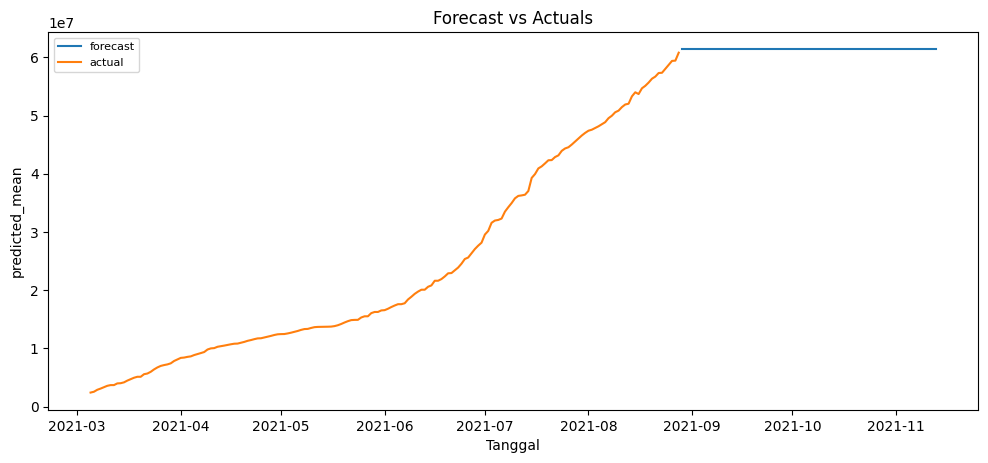

In [ ]:
index_fut_dat = pd.date_range(start='2021-08-29', end='2021-11-13')
model_full = ARIMA(data["Vaksinasi 1 Total Indonesia"], order = (0,1,1))
model_full = model_full.fit()
pred2 = model_full.predict(start=len(data), end=len(data)+len(test)-1, typ = 'levels')
print(pred2.tail(10))
pred2.index = index_fut_dat
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=pred2.index, y = pred2, label='forecast')
sns.lineplot(x=data['Tanggal'],y = data["Vaksinasi 1 Total Indonesia"],label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Vaksinisasi 2

167    5.508894e+07
168    5.588863e+07
169    5.649488e+07
170    5.676274e+07
171    5.751881e+07
172    5.726985e+07
173    5.832279e+07
174    5.886705e+07
175    5.958584e+07
176    5.936370e+07
Name: predicted_mean, dtype: float64


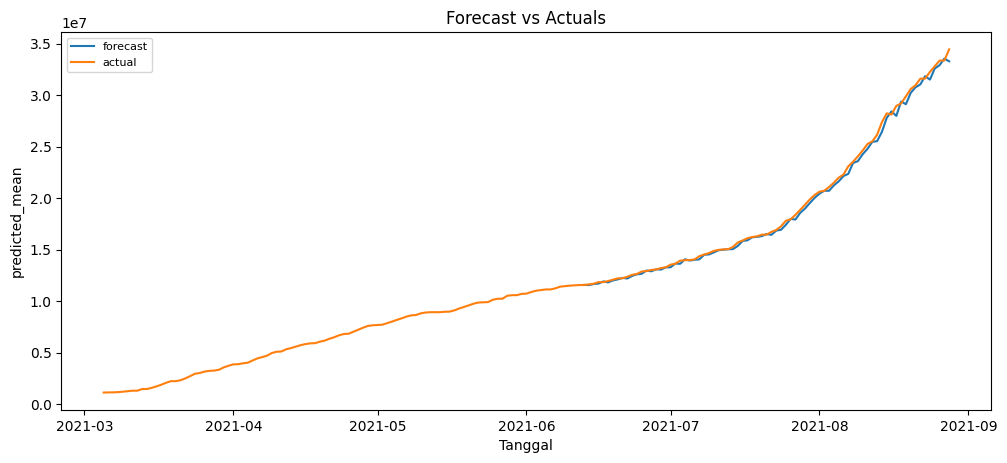

In [ ]:
train = data["Vaksinasi 2 Total Indonesia"][:100]
test = data["Vaksinasi 2 Total Indonesia"][100:]
model2 = ARIMA(data["Vaksinasi 2 Total Indonesia"], order = (0,1,1))
model2 = model2.fit()
start = len(train)
end = len(train)+len(test)-1
pred3 = model2.predict(start=start, end=end, typ = 'levels')
print(pred.tail(10))
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=data['Tanggal'], y = pred3, label='forecast')
sns.lineplot(x=data['Tanggal'], y = data["Vaksinasi 2 Total Indonesia"], label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
mean_squared_error(test, pred3, squared = False)

343245.9611734171

In [ ]:
pred3.mean()

19061552.141194355

In [ ]:
mean_absolute_percentage_error(test,pred3)

0.011395842852329727

In [ ]:
r2_score(test, pred3)

0.9974767703403536

In [ ]:
print(mean_absolute_error(test, pred3))

243791.57648562422


In [ ]:
print(median_absolute_error(test, pred3))

180633.89960775152


In [ ]:
rmse2 = sqrt(mean_squared_error(test, pred3))
print(rmse2)

343245.9611734171


244    3.495014e+07
245    3.495014e+07
246    3.495014e+07
247    3.495014e+07
248    3.495014e+07
249    3.495014e+07
250    3.495014e+07
251    3.495014e+07
252    3.495014e+07
253    3.495014e+07
Name: predicted_mean, dtype: float64


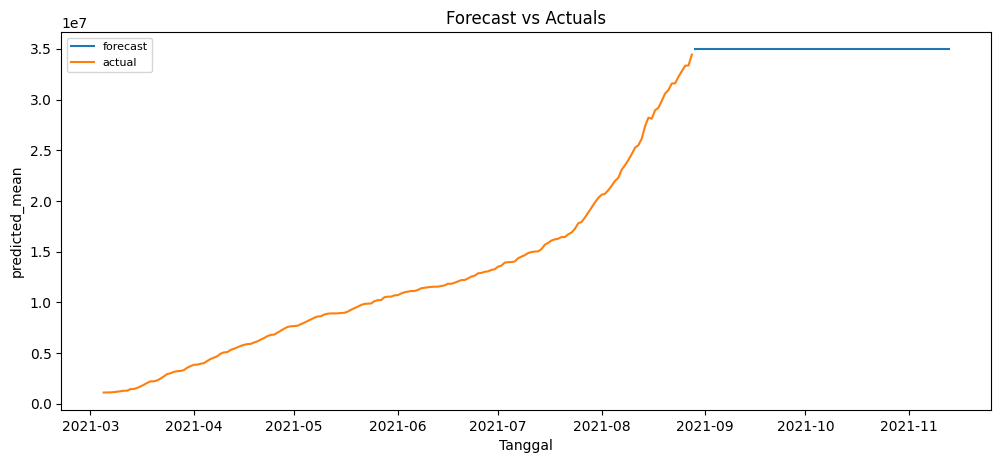

In [ ]:
index_fut_dat = pd.date_range(start='2021-08-29', end='2021-11-13')
model_full = ARIMA(data["Vaksinasi 2 Total Indonesia"], order = (0,1,1))
model_full = model_full.fit()
pred4 = model_full.predict(start=len(data), end=len(data)+len(test)-1, typ = 'levels')
print(pred4.tail(10))
pred4.index = index_fut_dat
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=pred4.index, y = pred4, label='forecast')
sns.lineplot(x=data['Tanggal'],y = data["Vaksinasi 2 Total Indonesia"],label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()